<a href="https://colab.research.google.com/github/PrithiviRajMK/ScalerProjects/blob/main/FlipitNews_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


The Gurugram-based company ‘FlipItNews’ aims to revolutionize the way Indians perceive finance, business, and capital market investment, by giving it a boost through artificial intelligence (AI) and machine learning (ML). They’re on a mission to reinvent financial literacy for Indians, where financial awareness is driven by smart information discovery and engagement with peers. Through their smart content discovery and contextual engagement, the company is simplifying business, finance, and investment for millennials and first-time investors

## Objective:
The goal of this project is to identify & categorize the news articles into several categories like politics, technology, sports, business and entertainment based on their content using a bunch of news articles extracted from the companies’ internal database.

### Import Required Libraries

In [ ]:
# Import the libraries

# For reading & manipulating the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
#Natural Language Processing
import nltk
#tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt')
#stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
#Lemmetization
from nltk import WordNetLemmatizer
nltk.download('wordnet')
#BoW & TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# For encoding the categorical variable
!pip install category_encoders
import category_encoders as ce

# To try out different ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# To perform train-test split
from sklearn.model_selection import train_test_split

# Performace Metrics for evaluating the model
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
data_df = pd.read_csv('/flipitnews-data.csv')

In [ ]:
# Shape of the dataset
print("Dataset contains {0} Rows and {1} Columns".format(data_df.shape[0], data_df.shape[1]))

Dataset contains 2225 Rows and 2 Columns


In [ ]:
data_df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
data_df.info

<bound method DataFrame.info of            Category                                            Article
0        Technology  tv future in the hands of viewers with home th...
1          Business  worldcom boss  left books alone  former worldc...
2            Sports  tigers wary of farrell  gamble  leicester say ...
3            Sports  yeading face newcastle in fa cup premiership s...
4     Entertainment  ocean s twelve raids box office ocean s twelve...
...             ...                                                ...
2220       Business  cars pull down us retail figures us retail sal...
2221       Politics  kilroy unveils immigration policy ex-chatshow ...
2222  Entertainment  rem announce new glasgow concert us band rem h...
2223       Politics  how political squabbles snowball it s become c...
2224         Sports  souness delight at euro progress boss graeme s...

[2225 rows x 2 columns]>

In [ ]:
data_df.describe()

,Category,Article
count,2225,2225
unique,5,2126
top,Sports,kennedy questions trust of blair lib dem leade...
freq,511,2


In [ ]:
data_df.nunique()

Category       5
Article     2126
dtype: int64

In [ ]:
# Check the distribution of categories
def unique_values(df):
  print("---- Analysing Categorical Variables ----\n")
  for col in df.astype('object').columns:
    if len(df[col].value_counts())<10:
      print(df[col].value_counts().to_string(),'\n')

unique_values(data_df)


---- Analysing Categorical Variables ----

Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386 



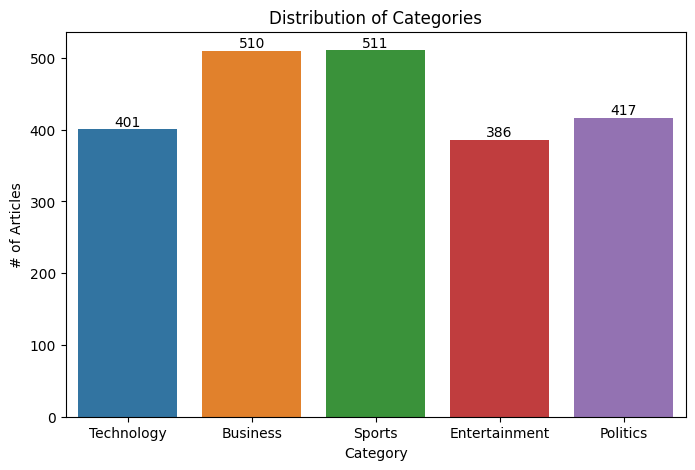

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Category', data=data_df)
ax.bar_label(ax.containers[0])
ax.set_title('Distribution of Categories')
ax.set_ylabel('# of Articles')
plt.show()


In [ ]:
# Viewing Article - before Text Processing
data_df['Article'][3]

'yeading face newcastle in fa cup premiership side newcastle united face a trip to ryman premier league leaders yeading in the fa cup third round.  the game - arguably the highlight of the draw - is a potential money-spinner for non-league yeading  who beat slough in the second round. conference side exeter city  who knocked out doncaster on saturday  will travel to old trafford to meet holders manchester united in january. arsenal were drawn at home to stoke and chelsea will play host to scunthorpe. the only other non-league side in the draw are hinckley united  who held brentford to a goalless draw on sunday. they will meet league one leaders luton if they win their replay against martin allen s team at griffin park.  a number of premiership teams face difficult away games against championship sides on the weekend of 8/9 january. third-placed everton visit plymouth  liverpool travel to burnley  crystal palace go to sunderland  fulham face carling cup semi-finalists watford  bolton me

##### - Single news article before text processing looks like this. It is observed that the text is already in lower case.

### Pre-process & Clean the Data

The major steps in cleaning the Text Data are:
*   Removing the Punctuations (like , . ! etc.,)
*   Converting the text to lower/upper case
*   Removing the stop words (frequently occurring words like a, an, the, etc.,)
*   Removing non-sensical words (“/n”, etc.,)
*   Tokenize the text
*   Stemming & Lemmatization
*   Normalize the text using Text Normalizers
*   Typo correction



In [ ]:
stop_words = list(stopwords.words('english'))

In [ ]:
def preprocess_text(sent):
  # Remove non-characters
  sent = re.sub('[^a-zA-Z]', ' ', sent)

  # Tokenize the Text into Words
  words = nltk.word_tokenize(sent)

  # Remove the stop words
  filtered_sent = [w for w in words if not w in stop_words]

  # Lemmatization
  lemmatizer = WordNetLemmatizer()
  new_text = [lemmatizer.lemmatize(word) for word in filtered_sent]
  new_text = ' '.join(new_text)

  return new_text

In [ ]:
data_df['Preprocessed_Article'] = data_df['Article'].apply(preprocess_text)

In [ ]:
data_df.describe()

,Category,Article,Preprocessed_Article
count,2225,2225,2225
unique,5,2126,2117
top,Sports,kennedy questions trust of blair lib dem leade...,microsoft get blogging bug software giant micr...
freq,511,2,2


In [ ]:
data_df.head()

,Category,Article,Preprocessed_Article
0,Technology,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,Business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,Sports,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...
3,Sports,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,Entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...


In [ ]:
# Single Article - after Text Processing
data_df['Preprocessed_Article'][3]

'yeading face newcastle fa cup premiership side newcastle united face trip ryman premier league leader yeading fa cup third round game arguably highlight draw potential money spinner non league yeading beat slough second round conference side exeter city knocked doncaster saturday travel old trafford meet holder manchester united january arsenal drawn home stoke chelsea play host scunthorpe non league side draw hinckley united held brentford goalless draw sunday meet league one leader luton win replay martin allen team griffin park number premiership team face difficult away game championship side weekend january third placed everton visit plymouth liverpool travel burnley crystal palace go sunderland fulham face carling cup semi finalist watford bolton meet ipswich aston villa drawn sheffield united premiership struggler norwich blackburn west brom away west ham cardiff preston north end respectively southampton visit northampton already beaten league two side carling cup earlier seas

##### - Single news article after text processing looks like above. We can see that the text is free of all punctuations and the lemmatization has converted various words into their respective root words.

### Data Transformation

In [ ]:
# Encoding the Target Variable using Ordinal Encoder
encode = ce.OrdinalEncoder(cols=['Category'])
data_df = encode.fit_transform(data_df)

In [ ]:
work_df = data_df.copy()

In [ ]:
choice = int(input("Choose \n (1) For Bag of Words \n (2) To use TF-IDF \n Choice: "))

if choice == 1:
  cv = CountVectorizer(max_features=5000)
  X = cv.fit_transform(work_df.Preprocessed_Article).toarray()
  y = np.array(work_df['Category'].values)

elif choice == 2:
  tf_idf = TfidfVectorizer()
  X = tf_idf.fit_transform(work_df.Preprocessed_Article).toarray()
  y = np.array(work_df['Category'].values)

else:
  print("Invalid Input!")

Choose 
 (1) For Bag of Words 
 (2) To use TF-IDF 
 Choice: 2


#### Segregate the Independent & Dependent variables

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Shape of the train & test data

In [ ]:
# Shape of train & test data sets after performing a 75:25 split
print("Number of rows in train set is {}".format(X_train.shape[0]))
print("Number of rows in test set is {}".format(X_test.shape[0]))

Number of rows in train set is 1668
Number of rows in test set is 557


## Base Model - Naive Bayes Classifier

In [ ]:
# Build Naive Bayes Classifier
nb_classifier = MultinomialNB()

# Train NB Model
nb_classifier.fit(X_train, y_train)

# Evaluate NB Model
nb_predictions = nb_classifier.predict(X_test)
print('Naive Bayes Classifier:')
print(classification_report(y_test, nb_predictions))

Naive Bayes Classifier:
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       103
           2       0.97      0.96      0.97       136
           3       0.98      1.00      0.99       124
           4       1.00      0.93      0.96        96
           5       0.93      0.99      0.96        98

    accuracy                           0.97       557
   macro avg       0.97      0.97      0.97       557
weighted avg       0.97      0.97      0.97       557



In [ ]:
# Predict the probabilities for each class
nb_probabilities = nb_classifier.predict_proba(X_test)

In [ ]:
# Calculate ROC AUC score for Naive Bayes
nb_roc_auc = roc_auc_score(y_test, nb_probabilities, multi_class='ovr')
print("ROC AUC Score of Base Model {:.3f}".format(nb_roc_auc))

ROC AUC Score of Base Model 0.998


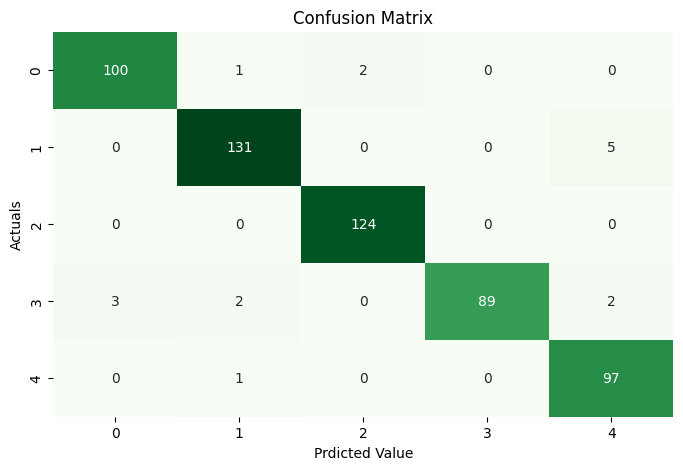

In [ ]:
# Confusion Matrix
y_pred_nb = nb_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel('Prdicted Value')
plt.ylabel('Actuals')
plt.show()

## Helper Functions

#### Model Training

In [ ]:
def model_train(obj):
  obj.fit(X_train, y_train)
  y_pred = obj.predict(X_test)
  y_pred_proba = obj.predict_proba(X_test)
  return y_pred, y_pred_proba

#### Model Evaluation

In [ ]:
def model_eval(obj, y_pred, y_pred_proba):
  print("**************************************")

  # Train & Test accuracy
  train_acc = accuracy_score(y_train, obj.predict(X_train))
  test_acc = accuracy_score(y_test, obj.predict(X_test))

  print("Train Accuracy: {:.3f}".format(train_acc))
  print("Test Accuracy: {:.3f}".format(test_acc))

  # ROC AUC Score
  print("ROC AUC Score: {:.3f}".format(roc_auc_score(y_test, y_pred_proba, multi_class='ovr')))

  # Precision, Recall and f1_score
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')

  print("Precision: {:.3f}".format(precision))
  print('Recall: {:.3f}'.format(recall))
  print('F1 Score: {:.3f}'.format(f1))

  print("**************************************")

## Linear SVM

In [ ]:
# Create SVM Model
from sklearn.svm import LinearSVC
svm_classifier = LinearSVC()

# Train SVM Model
svm_classifier.fit(X_train, y_train)

# Evaluate SVM Model
svm_predictions = svm_classifier.predict(X_test)
print('Linear SVM Classifier:')
print(classification_report(y_test, svm_predictions))

Linear SVM Classifier:
              precision    recall  f1-score   support

           1       0.99      0.98      0.99       103
           2       0.97      0.93      0.95       136
           3       0.98      1.00      0.99       124
           4       0.99      0.99      0.99        96
           5       0.95      0.98      0.96        98

    accuracy                           0.97       557
   macro avg       0.98      0.98      0.98       557
weighted avg       0.97      0.97      0.97       557



In [ ]:
svm_probabilities = svm_classifier.decision_function(X_test)

In [ ]:
from sklearn.preprocessing import label_binarize
from scipy.special import softmax

# Convert decision function scores to probabilities using softmax
svm_probabilities = softmax(svm_probabilities, axis=1)

# Binarize the true labels for multi-class ROC AUC
y_test_bin = label_binarize(y_test, classes=data_df['Category'].unique())

# Calculate ROC AUC score for Linear SVM
svm_roc_auc = roc_auc_score(y_test_bin, svm_probabilities, multi_class='ovr')

In [ ]:
print('Linear SVM ROC AUC {:.3f}'.format(svm_roc_auc))

Linear SVM ROC AUC 0.999


## Decision Tree Classifier Model

In [ ]:
# Create the Model Object
dt = DecisionTreeClassifier()

# Train the model
y_pred_dt, y_pred_proba_dt = model_train(dt)

# Evaluate the model
model_eval(dt, y_pred_dt, y_pred_proba_dt)

**************************************
Train Accuracy: 1.000
Test Accuracy: 0.820
ROC AUC Score: 0.884
Precision: 0.823
Recall: 0.820
F1 Score: 0.820
**************************************


## Nearest Neighbors Classifier

In [ ]:
# Creating the model object
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
y_pred_knn, y_pred_proba_knn = model_train(knn)

# Evalute the model
model_eval(knn, y_pred_knn, y_pred_proba_knn)

**************************************
Train Accuracy: 0.957
Test Accuracy: 0.937
ROC AUC Score: 0.990
Precision: 0.938
Recall: 0.937
F1 Score: 0.937
**************************************


## Random Forest Classifier

In [ ]:
# Create the model
rf = RandomForestClassifier()

# Train the model
y_pred_rf, y_pred_proba_rf = model_train(rf)

# Evaluate the model
model_eval(rf, y_pred_rf, y_pred_proba_rf)

**************************************
Train Accuracy: 1.000
Test Accuracy: 0.957
ROC AUC Score: 0.998
Precision: 0.958
Recall: 0.957
F1 Score: 0.957
**************************************


## **Questionnaire**:

Questionnaire:

1.How many news articles are present in the dataset that we have?

Ans :-  2225

2.Most of the news articles are from Sports & Business category.

3.Only 401 no. of articles belong to the ‘Technology’ category.

4.What are Stop Words and why should they be removed from the text data?

Ans  Stop words are Commanly used word that Considered to have little semantic menaing or caring less information comparedto other content words
Eg : 'the', 'and','is','in','a
Benefits
* Size reduction
* Noise Reduction
* Improved accuracy
* Focus on important words

5.Explain the difference between Stemming and Lemmatization.

Ans Stemming:
Stemming is a process of reducing a word to its base or root form by removing suffixes or prefixes. It applies a set of heuristic rules to chop off the affixes from a word, resulting in the stem. The stemmed word may not always be a valid word in the language, but it represents the core meaning of the word. Stemming is a relatively simpler and faster technique compared to lemmatization

Lemmatization:
Lemmatization, on the other hand, is a more advanced technique that reduces words to their base or dictionary form, known as the lemma. Unlike stemming, lemmatization considers the context and part of speech of a word to determine its lemma accurately. It uses morphological analysis and looks up words in a dictionary or lexicon to find their proper lemmas

6.Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other?

AnsIn terms of computational efficiency, Bag of Words (BoW) is generally considered more efficient. However, TF-IDF is more efficient in representing the importance and rarity of words. The choice depends on the specific requirements of the task.

7.What’s the shape of train & test data sets after performing a 75:25 split.

ANs :- Train 1668
       Test  557

8.Which of the following is found to be the best performing model..

a. Random Forest b. Nearest Neighbors c. Naive Bayes

Ans Random Forest

9.According to this particular use case, both precision and recall are equally important. (T/F)

Ans :-True



## **Summary**

The final comparative summary of the models (Naive Bayes, Decision Tree, Nearest Neighbour, Random Forest) for news article categorization is:

* Random Forest

In the table, each model is evaluated based on various performance metrics such as accuracy, precision, recall, and F1-score. The metrics provide an indication of how well the models perform in categorizing news articles based on their content.